##### This project is used to create a sentiment report for the clustered data. It makes use of the previously trained `Neural Network` to classify tweets as `Good`, `Bad` or `Useless` (discarded). It generates trend values `sentiment_trend.csv` and plot `sentiment_trend.jpg`

# The Good, The Bad and The Ugly (Tweet)

In [1]:
import pickle
import pandas as pd
import numpy as np
from pprint import pprint
import re
import os
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from matplotlib import pyplot
import matplotlib

In [2]:
stemmer = EnglishStemmer()
stop_words = stopwords.words('english')
my_stop_words='to and http https com co www'
stop_words=stop_words+my_stop_words.split()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
def preprocess(_df):
    _df['text']=_df['text'].apply(lambda tweet:str(tweet).lower() if str(tweet).count('#')<=3 else '')
    _df['text']=_df['text'].apply(lambda tweet:re.sub('[^ ]+\.[^ ]+','',tweet))
#     _df['text']=_df['text'].apply(lambda tweet:re.sub('#[^ ]+','',tweet))
    _df['text']=_df['text'].apply(lambda tweet:re.sub('[^a-zA-Z0-9.!? ]',' ',(tweet)))
    _df['text']=_df['text'].apply(lambda tweet:' '.join([word for word in tweet.strip().split() if word not in stop_words]))
    _df['text']=_df['text'].apply(lambda tweet:stemmer.stem(tweet.strip()))
    return _df

### Load Saved Model

In [4]:
classifier = pickle.load(open('saved_classifier/good_bad_classifier.sav', 'rb'))

In [5]:
new_text=["""Coinbase   Hires Silicon Valley Dealmaker as Firm Explores Potential Acquisitions - CCN: Bitcoin, Ethereum, ICO, Blockchain & Cryptocurrency News http://dlvr.it/QJwjKW pic.twitter.com/T8JLIwUsew""",
          """RT @BTCTN: 80,000 New Merchants in Europe Gain Option to Accept Crypto https://t.co/s8X21LiIGz #Bitcoin https://t.co/fkFPhqrSc3""",
         """CBOE Recommends That The SEC Allows Bitcoin Exchange-Traded-Funds https://t.co/NxbzcJMbs2 #bitcoin #news… https://t.co/vLAjwJNykK""",
          """RT @CryptoNewswire: G20 agrees to 'monitor' cryptocurrencies but no action yet - https://t.co/0edeUekw2u #finance #fintech #cryptocurrency""",
          """CBOE Nudges SEC to Allow Bitcoin ETFs in New Letter"""
         ]
new_text=preprocess(pd.DataFrame({'text':new_text}))
new_text=new_text[new_text['text']!='']
new_text

,text
0,coinbase hires silicon valley dealmaker firm e...
1,rt btctn 80 000 new merchants europe gain opti...
2,cboe recommends sec allows bitcoin exchange tr...
3,rt cryptonewswire g20 agrees monitor cryptocur...
4,cboe nudges sec allow bitcoin etfs new lett


In [6]:
print( classifier.predict(new_text['text']))
classifier.predict_proba(new_text['text'])

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


array([[9.39474442e-01, 7.78418782e-05, 6.66474964e-03, 1.02518033e-02],
       [1.00000000e+00, 7.08791504e-09, 2.38850182e-05, 2.61501068e-08],
       [9.99669737e-01, 5.85358974e-03, 6.53939959e-05, 2.14971859e-04],
       [7.25005172e-01, 3.19989617e-03, 7.08659031e-04, 1.28317112e-01],
       [9.97487330e-01, 4.11693115e-06, 2.58348936e-03, 2.37358449e-03]])

### Load Dataset

In [7]:
%time df=pd.read_csv('dataset/csv/clustered_dataset/cluster/1490363725.csv',encoding = 'utf8')
print(df.shape)
df.head()

FileNotFoundError: File b'dataset/csv/clustered_dataset/cluster/1490363725.csv' does not exist

NameError: name 'df' is not defined

### Preprocess

In [8]:
p_df=preprocess(df.copy())
print(p_df.shape)
p_df=p_df[p_df['text']!='']
print(p_df.shape)
p_df.tail()

(538, 11)
(538, 11)


,fullname,html,id,likes,replies,retweets,text,timestamp,url,user,cluster
533,AllThingsAltBitcoins,"<p class=""TweetTextSize js-tweet-text tweet-te...",845423277854150657,1,0.0,0.0,bitcoin price falling still hold,1490379791,/alt_bit_coins/status/845423277854150657,alt_bit_coins,2
534,🐯 Michael Trooder,"<p class=""TweetTextSize js-tweet-text tweet-te...",845423421731201024,1,0.0,0.0,last 10 days altcoin market cap risen 4 billio...,1490379825,/cryptocurrency0/status/845423421731201024,cryptocurrency0,2
535,Emma Godoy,"<p class=""TweetTextSize js-tweet-text tweet-te...",845424147320705024,0,1.0,1.0,economia china bitcoin,1490379998,/Neverfransis/status/845424147320705024,Neverfransis,3
536,CoinDesk,"<p class=""TweetTextSize js-tweet-text tweet-te...",845424752898560002,28,7.0,41.0,latest bitcoin price index usd,1490380142,/coindesk/status/845424752898560002,coindesk,2
537,[ Romano ],"<p class=""TweetTextSize js-tweet-text tweet-te...",845424773912018945,18,5.0,6.0,bitcoin could bounce again.,1490380147,/RNR_0/status/845424773912018945,RNR_0,3


### Classification 

In [9]:
%time prediction=classifier.predict(p_df['text'])
%time probability=classifier.predict_proba(p_df['text'])

CPU times: user 17.8 ms, sys: 1.8 ms, total: 19.6 ms
Wall time: 18.1 ms
CPU times: user 18.5 ms, sys: 389 µs, total: 18.9 ms
Wall time: 18.5 ms


### Save filtered data

In [10]:
good_tweet_index=[i for i,val in enumerate(prediction) if val==1]
good_filtered_df = p_df.iloc[good_tweet_index]
good_actual_df = df.iloc[good_filtered_df.index]
good_actual_df.to_csv('dataset/csv/good_bad/good_filtered.csv', sep=',', index=False)
good_actual_df.tail()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [46]:
bad_tweet_index=[i for i,val in enumerate(prediction) if val==0]
bad_filtered_df = p_df.iloc[bad_tweet_index]
bad_actual_df = df.iloc[bad_filtered_df.index]
bad_actual_df.to_csv('dataset/csv/good_bad/bad_filtered.csv', sep=',', index=False)
bad_actual_df.tail()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Sentiment Analysis

In [10]:
proba_good_tweet_index=[]
proba_bad_tweet_index=[]
for i,row in enumerate(probability):
    if row[0]>0.95: 
        proba_bad_tweet_index.append(i)
    if row[1]>0.95:
        proba_good_tweet_index.append(i)
        
proba_good_filtered_df=p_df.iloc[proba_good_tweet_index]
proba_bad_filtered_df=p_df.iloc[proba_bad_tweet_index]

proba_good_actual_df = df.iloc[proba_good_filtered_df.index]
proba_bad_actual_df = df.iloc[proba_bad_filtered_df.index]

# proba_good_actual_df.to_csv('dataset/csv/good_bad/very_good_filtered.csv', sep=',', index=False)
# proba_bad_actual_df.to_csv('dataset/csv/good_bad/very_bad_filtered.csv', sep=',', index=False)

print(proba_good_actual_df.shape,proba_bad_actual_df.shape)

NameError: name 'probability' is not defined

In [11]:
proba_good_actual_df.tail()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user,cluster
520,BitcoinAgile,"<p class=""TweetTextSize js-tweet-text tweet-te...",845418804012367876,0,0.0,0.0,Report: Rise in #bitcoin Related Scams on Soci...,1490378724,/bitcoinagile/status/845418804012367876,bitcoinagile,3
524,AllThingsAltBitcoins,"<p class=""TweetTextSize js-tweet-text tweet-te...",845419297241546752,0,0.0,0.0,Re: Bitcoin Classic developer admits it: block...,1490378842,/alt_bit_coins/status/845419297241546752,alt_bit_coins,3
525,AllThingsAltBitcoins,"<p class=""TweetTextSize js-tweet-text tweet-te...",845419988559286273,1,0.0,0.0,Report: Rise in #bitcoin Related Scams on Soci...,1490379007,/alt_bit_coins/status/845419988559286273,alt_bit_coins,3
526,Cryptogeeks,"<p class=""TweetTextSize js-tweet-text tweet-te...",845422049766072321,0,0.0,0.0,Bitcoin: When the price is falling but your st...,1490379498,/Cryptogeeks/status/845422049766072321,Cryptogeeks,2
533,AllThingsAltBitcoins,"<p class=""TweetTextSize js-tweet-text tweet-te...",845423277854150657,1,0.0,0.0,Bitcoin: When the price is falling but your st...,1490379791,/alt_bit_coins/status/845423277854150657,alt_bit_coins,2


In [12]:
proba_bad_actual_df.tail()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user,cluster
500,∞,"<p class=""TweetTextSize js-tweet-text tweet-te...",845415639837749248,0,1.0,0.0,I honestly believe ETH and BTC will move oppos...,1490377970,/DailyBrainGame/status/845415639837749248,DailyBrainGame,2
511,TradeGoX,"<p class=""TweetTextSize js-tweet-text tweet-te...",845417212013768705,0,0.0,0.0,Coinbase Adding Margin Trading for Bitcoin Use...,1490378345,/TradeGoX/status/845417212013768705,TradeGoX,0
513,TBM NEWS,"<p class=""TweetTextSize js-tweet-text tweet-te...",845417711316287488,0,0.0,0.0,Coinbase Adding Margin Trading for Bitcoin Use...,1490378464,/TBMGPT_News/status/845417711316287488,TBMGPT_News,0
517,mamoru.io,"<p class=""TweetTextSize js-tweet-text tweet-te...",845418332669034496,1,0.0,3.0,Blockchain development in Australia overseen b...,1490378612,/mamoru_io/status/845418332669034496,mamoru_io,3
521,Alberto Jauregui,"<p class=""TweetTextSize js-tweet-text tweet-te...",845418822307905536,1,0.0,1.0,http://ift.tt/2nRreNV Second Ukraine Bank Lau...,1490378729,/CryptoJauregui/status/845418822307905536,CryptoJauregui,2


In [13]:
proba_df=pd.DataFrame(probability)

proba_df.to_csv('dataset/csv/good_bad/proba.csv', sep=',')

### List Cluster

In [14]:
file_list=os.listdir('dataset/csv/clustered_dataset/cluster/')
file_list.remove('.DS_Store')
file_list=sorted([f.split('.')[0] for f in file_list])
file_list

['1490363725',
 '1491918925',
 '1492005325',
 '1493646925',
 '1495288525',
 '1496930125',
 '1498571725',
 '1500213325',
 '1501854925',
 '1503496525',
 '1505138125',
 '1506779725',
 '1508421325',
 '1510062925',
 '1511704525',
 '1513346125',
 '1514987725',
 '1516629325',
 '1518270925',
 '1519912525',
 '1521381325']

### Main Loop

In [16]:
opn=0
close=0
senti_close=[]
senti_open=[]
senti_high=[]
senti_low=[]

for i,file_name in enumerate(file_list):
    high=opn
    low=opn
    close=opn
    
    df=pd.read_csv('dataset/csv/clustered_dataset/cluster/{}.csv'.format(file_name),encoding = 'utf8')
    p_df=preprocess(df.copy())
    p_df=p_df[p_df['text']!='']
    probability=classifier.predict_proba(p_df['text'])
    proba_good_tweet_index=[]
    proba_bad_tweet_index=[]
#     print(probability)
    for i,row in enumerate(probability):
        if row[0]>0.5:
            close+=row[0]
            if close>high:
                high=close
#             proba_good_tweet_index.append(i)
        if row[1]>0.5: 
            close-=row[1]
            if close<low:
                low=close
#             proba_bad_tweet_index.append(i)

#     proba_good_filtered_df=p_df.iloc[proba_good_tweet_index]
#     proba_bad_filtered_df=p_df.iloc[proba_bad_tweet_index]

#     proba_good_actual_df = df.iloc[proba_good_filtered_df.index]
#     proba_bad_actual_df = df.iloc[proba_bad_filtered_df.index]

#     proba_good_actual_df.to_csv('dataset/csv/good_bad/cluster/{}_good.csv'.format(file_name), sep=',', index=False)
#     proba_bad_actual_df.to_csv('dataset/csv/good_bad/cluster/{}_bad.csv'.format(file_name), sep=',', index=False)
#     print(file_name)
    
#     g = opn + proba_good_actual_df['cluster'].value_counts().sum()
#     b = opn + proba_bad_actual_df['cluster'].value_counts().sum()
    
    senti_close.append(close)
    senti_open.append(opn)
    senti_high.append(high)
    senti_low.append(low)
    opn=close
    
senti_df = pd.DataFrame({'close':senti_close})
senti_df['high'] = senti_high
senti_df['open'] = senti_open
senti_df['low'] = senti_low
senti_df['time'] = file_list
senti_df.to_csv('dataset/csv/good_bad/sentiment_trend.csv'.format(file_name), sep=',', index=False)



### Plot Trend Line

In [17]:
%time history_df=pd.read_csv('dataset/csv/good_bad/history_day.csv',encoding = 'utf8')
history_df = history_df.sort_values(['time'], ascending=True)
history_df=history_df[(history_df['time']>=1490363725)&(history_df['time']<=1521381325)]
history_df.head()

CPU times: user 5.24 ms, sys: 3.76 ms, total: 9 ms
Wall time: 7.16 ms


,close,high,low,open,time,volumefrom,volumeto
1645,966.30,995.96,890.43,939.70,1490400000,127044.59,1.183951e+08
1646,969.44,1004.32,946.65,966.30,1490486400,85332.41,8.325598e+07
1647,1045.14,1048.85,961.80,969.44,1490572800,91256.43,9.233222e+07
1648,1044.42,1068.41,1015.45,1045.14,1490659200,80000.90,8.356755e+07
1649,1041.90,1058.66,1008.34,1044.42,1490745600,68852.51,7.126154e+07


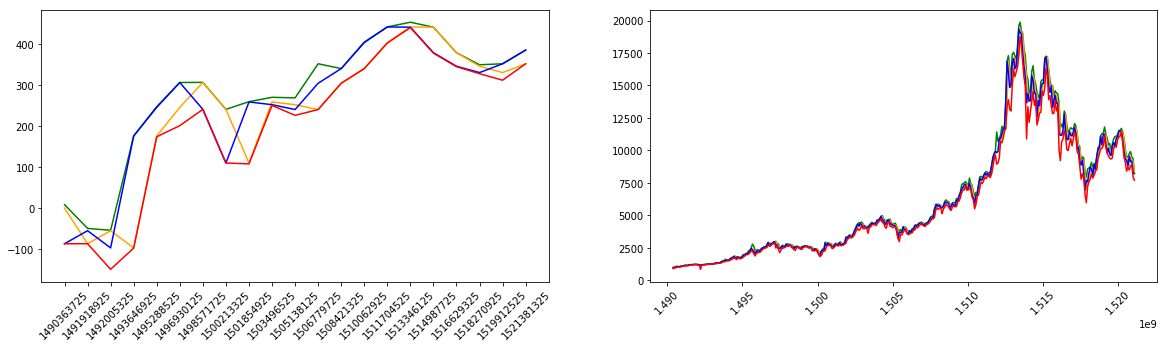

In [18]:
matplotlib.rcParams['figure.figsize'] = (20,5)
pyplot.subplot(1,2,1)
pyplot.xticks(rotation=45)
pyplot.plot(file_list,senti_high,color='green')
pyplot.plot(file_list,senti_open,color='orange')
pyplot.plot(file_list,senti_close,color='blue')
pyplot.plot(file_list,senti_low,color='red')

pyplot.subplot(1,2,2)
pyplot.xticks(rotation=45)
pyplot.plot(history_df.iloc[:,4],history_df.iloc[:,1],color='green')
pyplot.plot(history_df.iloc[:,4],history_df.iloc[:,3],color='orange')
pyplot.plot(history_df.iloc[:,4],history_df.iloc[:,0],color='blue')
pyplot.plot(history_df.iloc[:,4],history_df.iloc[:,2],color='red')
pyplot.savefig('plot/sentiment_trend_relative_proba.jpg')

In [43]:
path='/Users/oyo/Desktop/tweets/dataset/csv/clustered_dataset/history_day.csv'

h=pd.read_csv(path,encoding = 'utf8')
type(h.iloc[0,0])

numpy.float64

NameError: name 'Datetime' is not defined